## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_March2023.csv', firstRow=120, lastRow=126)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_280223_S121-126.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=118s and ended at t=524s; mass=44.2968g
This equals a volume of 44.386m; expected was 44.75mL; error is 0.814%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


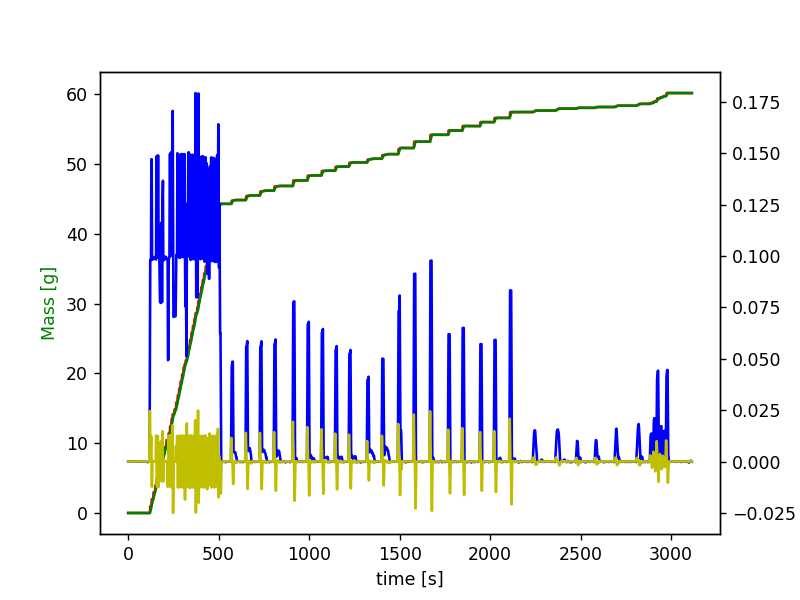

Addition of 0.551g Plantacare 2000 detected from 566s to 606s - expected volume = 0.587mL and actual volume = 0.51mL (resulting error is 13.002%)
Addition of 0.67g Plantacare 2000 detected from 646s to 686s - expected volume = 0.587mL and actual volume = 0.621mL (resulting error is 5.861%)
Addition of 0.688g Plantacare 2000 detected from 724s to 772s - expected volume = 0.571mL and actual volume = 0.629mL (resulting error is 10.152%)
Addition of 0.673g Plantacare 2000 detected from 802s to 846s - expected volume = 0.571mL and actual volume = 0.615mL (resulting error is 7.734%)
Addition of 0.795g Dehyton MC detected from 906s to 936s - expected volume = 0.784mL and actual volume = 0.735mL (resulting error is 6.297%)
Addition of 0.725g Dehyton MC detected from 986s to 1032s - expected volume = 0.605mL and actual volume = 0.676mL (resulting error is 11.655%)
Addition of 0.683g Dehyton MC detected from 1064s to 1110s - expected volume = 0.605mL and actual volume = 0.636mL (resulting error 

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


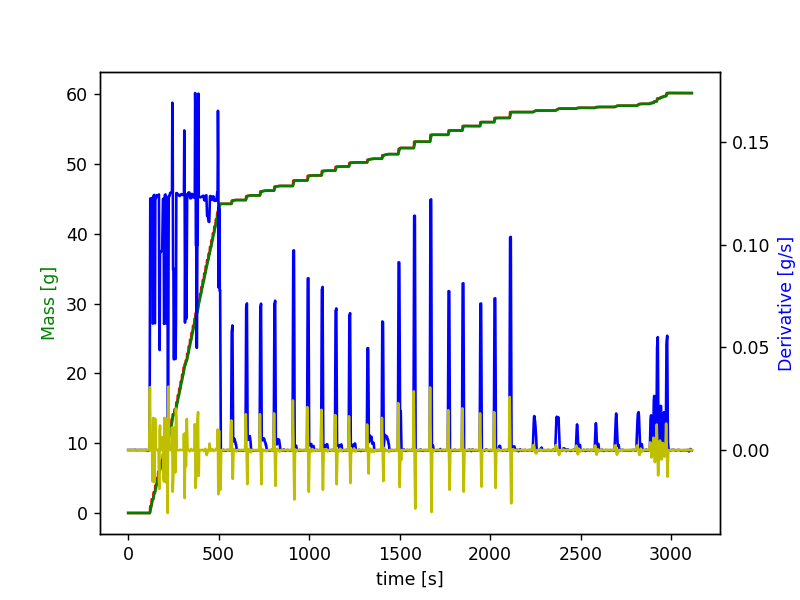

Addition of 0.218g Luviquat Excellence detected from 2232s to 2262s - expected volume = 0.222mL and actual volume = 0.198mL (resulting error is 11.122%)
Addition of 0.281g Luviquat Excellence detected from 2284s to 2390s - expected volume = 0.256mL and actual volume = 0.251mL (resulting error is 2.134%)
Addition of 0.116g Luviquat Excellence detected from 2400s to 2504s - expected volume = 0.094mL and actual volume = 0.106mL (resulting error is 12.864%)
Addition of 0.125g Luviquat Excellence detected from 2574s to 2606s - expected volume = 0.11mL and actual volume = 0.113mL (resulting error is 3.512%)
Addition of 0.192g Luviquat Excellence detected from 2684s to 2718s - expected volume = 0.175mL and actual volume = 0.174mL (resulting error is 0.195%)
Addition of 0.273g Luviquat Excellence detected from 2804s to 2846s - expected volume = 0.247mL and actual volume = 0.246mL (resulting error is 0.319%)


In [5]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=4, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


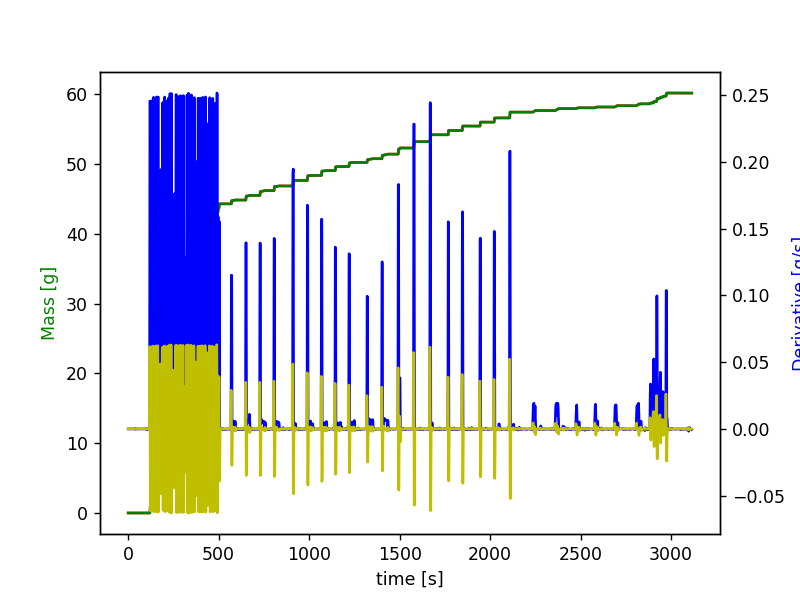

Addition of 0.136g Arlypon TT detected from 2880s to 2894s - expected volume = 0.154mL and actual volume = 0.142mL (resulting error is 7.483%)
Addition of 0.211g Arlypon TT detected from 2898s to 2912s - expected volume = 0.213mL and actual volume = 0.217mL (resulting error is 1.932%)
Addition of 0.442g Arlypon TT detected from 2916s to 2932s - expected volume = 0.475mL and actual volume = 0.466mL (resulting error is 1.885%)
Addition of 0.172g Arlypon TT detected from 2934s to 2948s - expected volume = 0.137mL and actual volume = 0.179mL (resulting error is 31.298%)
Addition of 0.151g Arlypon TT detected from 2950s to 2966s - expected volume = 0.127mL and actual volume = 0.158mL (resulting error is 24.38%)
Addition of 0.443g Arlypon TT detected from 2968s to 2984s - expected volume = 0.473mL and actual volume = 0.46mL (resulting error is 2.637%)


In [6]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [7]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_280223_S121-S126.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_4852\2779710816.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
120,121.0,0.0,0.0,0.0,0.0,0.000000,7.915090,0.0,0.000000,0.000000,12.625694,0.0,0.000000,2.169030,0.0,0.0,0.0,0.0,1.354710
121,122.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,9.128324,0.000000,0.0,11.782454,2.811005,0.0,0.0,0.0,0.0,2.111694
122,123.0,0.0,0.0,0.0,0.0,11.911484,13.738991,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.134264,0.0,0.0,0.0,0.0,4.317523
123,124.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,11.812097,9.818552,0.000000,0.0,0.000000,1.237321,0.0,0.0,0.0,0.0,1.699156
124,125.0,0.0,0.0,0.0,0.0,0.000000,11.584560,0.0,8.629505,0.000000,0.000000,0.0,0.000000,1.873800,0.0,0.0,0.0,0.0,1.471661
125,126.0,0.0,0.0,0.0,0.0,13.322302,0.000000,0.0,0.000000,0.000000,0.000000,0.0,8.280055,2.674104,0.0,0.0,0.0,0.0,4.337312
